In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

# Here we focus only on data from Lausanne marathon 2016 

In [2]:
data = pd.read_pickle('../datasets/trial_dataset')
data.head()

,nom,nat,an,lieu,temps,cat/rang
0,Bekele-Clerc Alemitu,BEL,1976,Bern,"2:42.41,0",42-D40
1,Yerly Laurence,SUI,1972,Cernier,"2:51.45,8",42-D40
2,Vrajic Marija,CRO,1976,CRO-Zagreb,Maksimir,42-D40
3,Morall Zelah,SUI,1969,GB-Penzance,"2:53.43,2",42-D40
4,Annen-Lamard Sandra,SUI,1977,Ecublens,-----,42-D30


## Stats on age

**Ideas**:
- statistical tests for men and women age over time:
    1. variance analysis (F test in normal case)
    2. mean analysis (T-test/ Welch test)
    3. plot with p-value and some critical thresholds (0.2,0.1,0.05,0.01)
- interactive plot of age distribution over time for men and women

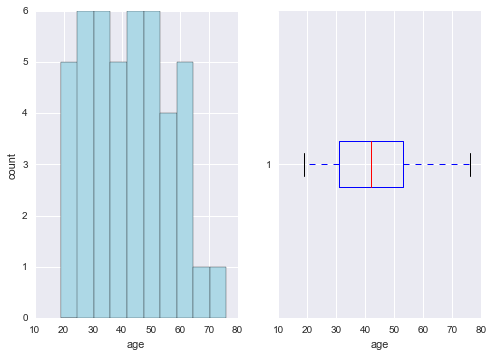

In [84]:
# get age of participants and plot its distribution
age = 2016 - data.an.value_counts().index.astype(int)
plt.subplot(1,2,1)
plt.hist(age,color='lightblue')
plt.xlabel('age')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.boxplot(age,vert=False)
plt.xlabel('age')

# Merged dataset from Lausanne Marathon

Import merged dataset of 2016 Lausanne Marathon:

In [3]:
data = pd.read_pickle('lausanne.pickle')
data.head(10)

,cat,sex,rang,nom,an,lieu,temps,retard
0,21,M,147,Abaidia Jilani,1966,St-Légier-La Chiésaz,"1:45.28,4","25.56,8"
1,21,F,81,Abaidia Sandrine,1972,St-Légier,"1:49.40,8","24.09,5"
2,21,M,103,Abb Jochen,1948,Ernen,"2:50.40,7","1:21.28,7"
3,10,M,426,Abbas Dhia,1961,Lausanne,"1:13.04,1","38.13,0"
4,21,M,640,Abbet Florian,1982,Pully,"1:56.01,7","47.33,8"
5,10,F,517,Abdala Maria Lucia,1979,Lausanne,"1:01.30,8","27.09,1"
6,10,M,152,Abdela Esa,1992,Pully,"42.44,1","14.26,0"
7,21,M,67,Abdelaziem Ahmed Ramy Bac,1992,Lausanne,"1:29.06,1","20.32,9"
8,42,M,38,Abderhalden Matthias,1983,Chavannes-près-Renens,"3:08.43,6","51.37,4"
9,21,M,3,Abdesmed Mohamed,1956,F-Amiens,"1:33.24,8","4.12,8"


Take a look at the age distribution of the whole population:

In [20]:
age = 2016-data.an.astype(int)

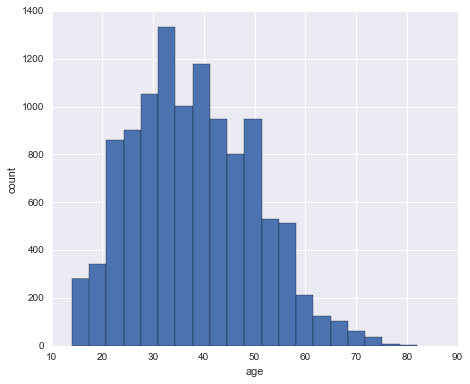

In [35]:
# get age of participants and plot its distribution
plt.subplot(1,2,1)
plt.hist(age,bins=20)
plt.gca().set_xlabel('age')
plt.gca().set_ylabel('count')
plt.gcf().set_size_inches(16,6)

Now compare the age distribution for women and men:

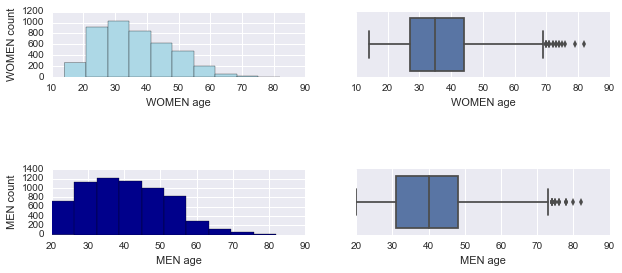

In [39]:
age_women = 2016 - data[data.sex=='F'].an.astype(int)
age_men = 2016 - data[data.sex=='M'].an.astype(int)
plt.subplot(3,2,1)
plt.hist(age_women,color='lightblue')
plt.xlabel('WOMEN age')
plt.ylabel('WOMEN count')
plt.subplot(3,2,5)
plt.hist(age_men,color='darkblue')
plt.xlabel('MEN age')
plt.ylabel('MEN count')
plt.subplot(3,2,2)
fig1 = sns.boxplot(age_women)
fig1.set(xlabel='WOMEN age')
plt.gcf().set_size_inches(10,4)
plt.subplot(3,2,6)
fig2 = sns.boxplot(age_men)
fig2.set(xlabel='MEN age')
plt.gcf().set_size_inches(10,4)